In [7]:
import sys
import os
import struct
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline

fpX = np.float32

import torch 
root = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(os.path.join(root, 'code'))
from plotting import plot_utils, summary_plots, load_fits, plot_prf_params
plot_utils.set_plotting_defaults()
from utils import roi_utils, nsd_utils, default_paths, stats_utils

In [2]:
# Load results of the fitting procedure

subject = 1
volume_space=True
fitting_type = 'sketch_tokens'

root = os.path.dirname(os.path.dirname(os.getcwd()))
out, fig_save_folder = load_fits.load_fit_results(subject, volume_space, fitting_type, \
                                                  n_from_end=1, root=root, verbose=True);
load_fits.print_output_summary(out)

if not os.path.exists(fig_save_folder):
    os.makedirs(fig_save_folder)

loading from /user_data/mmhender/imStat/model_fits/S01/sketch_tokens/Nov-11-2021_1659_27/all_fit_params

dict_keys(['subject', 'volume_space', 'fitting_type', 'fitting_type2', 'voxel_mask', 'brain_nii_shape', 'image_order', 'voxel_index', 'voxel_roi', 'voxel_ncsnr', 'aperture', 'aperture_rf_range', 'which_prf_grid', 'models', 'best_losses', 'best_lambdas', 'best_params', 'lambdas', 'val_cc', 'val_r2', 'partial_masks', 'partial_version_names', 'zscore_features', 'zscore_in_groups', 'ridge', 'debug', 'up_to_sess', 'single_sess', 'shuff_rnd_seed', 'use_precomputed_prfs', 'corr_each_feature', 'discrim_each_axis', 'val_voxel_data', 'val_voxel_data_pred', 'val_stim_data', 'min_pct_var', 'max_pc_to_retain', 'use_pca_st_feats', 'use_lda_st_feats', 'lda_discrim_type'])
subject = 1
volume_space = 1
fitting_type = sketch_tokens
voxel_mask: shape (699192,)
brain_nii_shape: shape (3,)
image_order: shape (15000,)
voxel_index: len 1
voxel_roi: len 4
voxel_ncsnr: shape (699192,)
aperture = 1.0
apertur

In [3]:
# roi_def = roi_utils.get_combined_rois(subject,include_all=True,include_body=False,volume_space=True,verbose=False) 
roi_def = roi_utils.get_combined_rois(subject,include_all=True,include_body=True,volume_space=True,verbose=False) 

skip_inds = [10,11,15,23]
retlabs, facelabs, placelabs, bodylabs, \
        ret_names, face_names, place_names, body_names = roi_def


In [9]:
port=33333
summary_plots.plot_summary_pycortex(out=out, subject=subject, fitting_type=fitting_type, \
                                port=port, roi_def=roi_def)

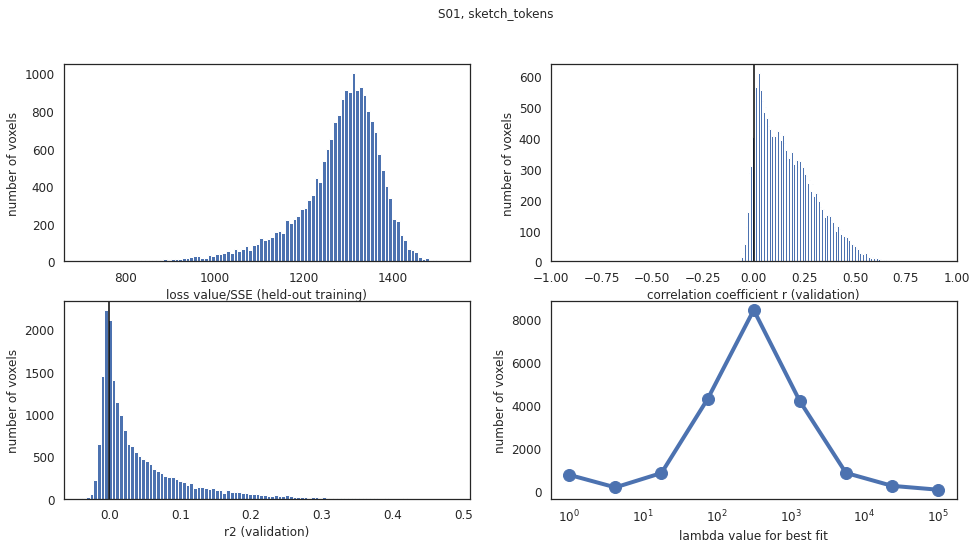

In [6]:
plot_utils.set_all_font_sizes(fs = 12)
summary_plots.plot_perf_summary(subject, fitting_type, out, fig_save_folder=fig_save_folder)

In [6]:
# plot_utils.plot_fit_summary_volume_space(subject, fitting_type,out, fig_save_folder)

In [7]:
summary_plots.plot_summary_pycortex(subject, fitting_type, out, roi_def=roi_def, port=33333)

Data is in 3d volume space
navigate browser to: 127.0.0.1:33333
Started server on port 33333


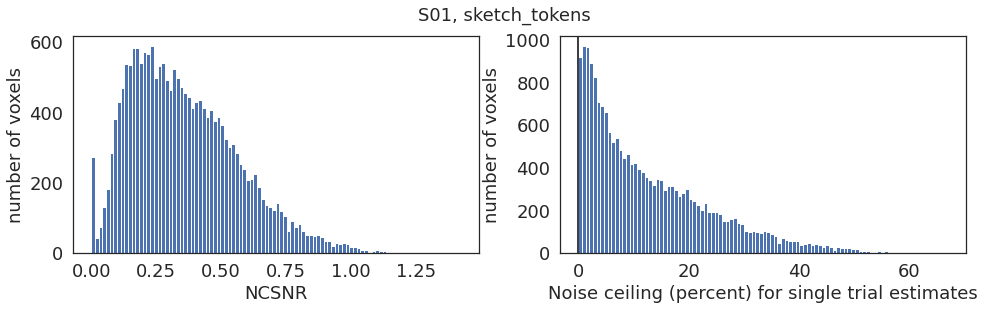

In [15]:
plot_utils.set_all_font_sizes(fs = 18)
summary_plots.plot_noise_ceilings(subject, fitting_type,out, fig_save_folder)

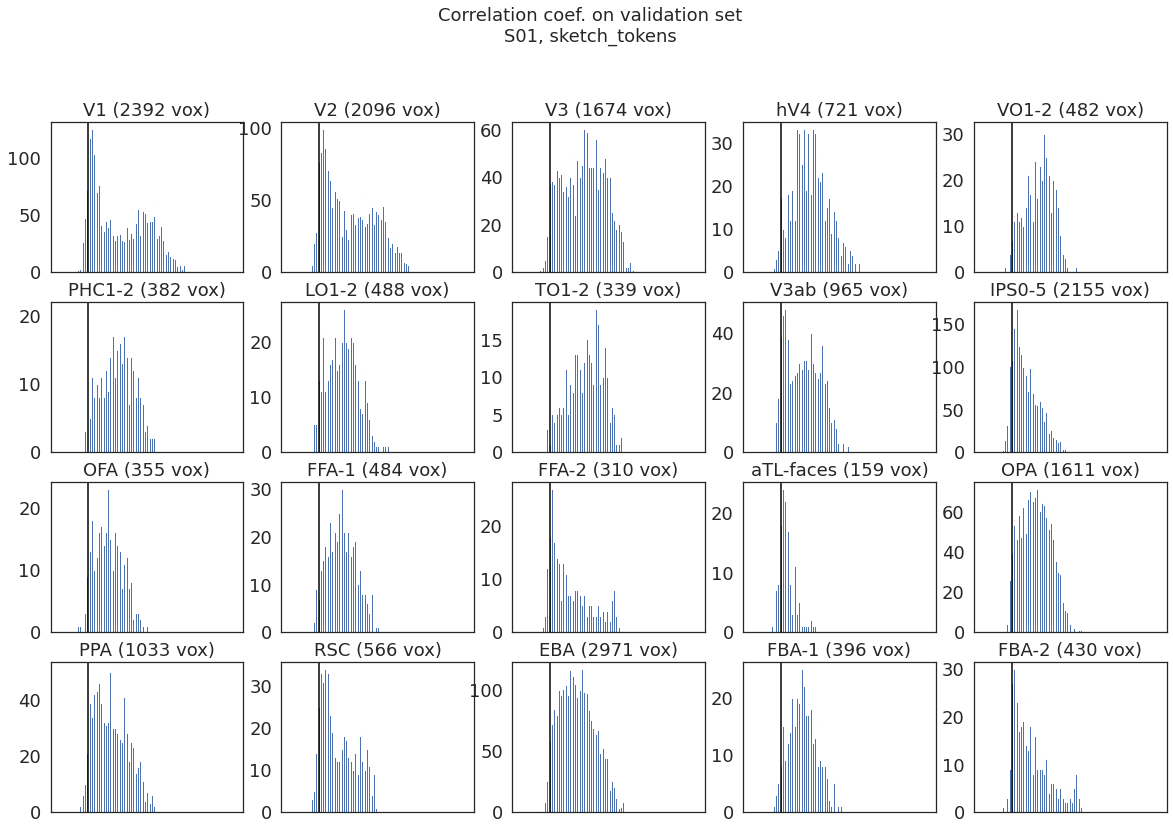

In [8]:
plot_utils.set_all_font_sizes(fs = 18)
summary_plots.plot_cc_each_roi(subject, fitting_type,out, roi_def=roi_def, skip_inds=skip_inds, \
                               fig_save_folder=fig_save_folder)

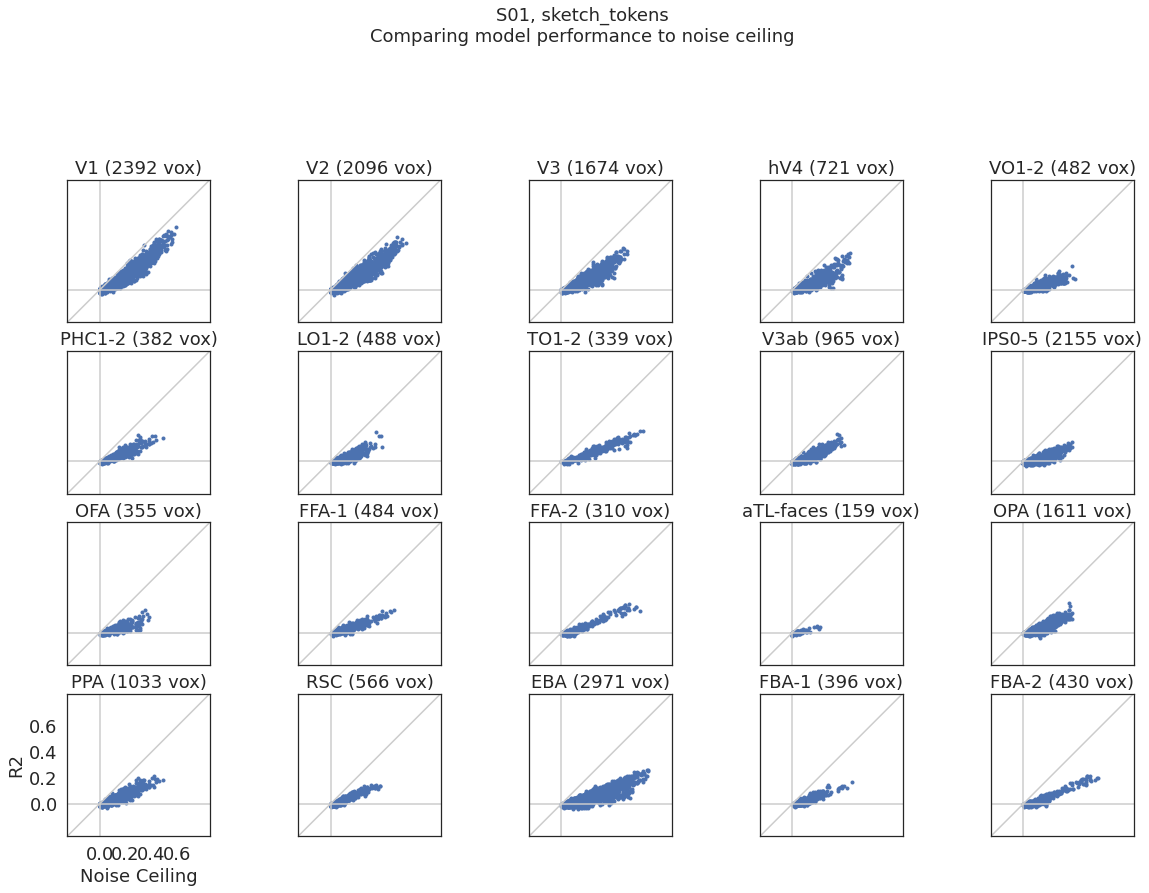

In [19]:
plot_utils.set_all_font_sizes(fs = 18)
summary_plots.plot_r2_vs_nc(subject, fitting_type,out, roi_def=roi_def, skip_inds=skip_inds, \
                            axlims = [-0.25, 0.85], fig_save_folder=fig_save_folder, fig_size=(20,24))

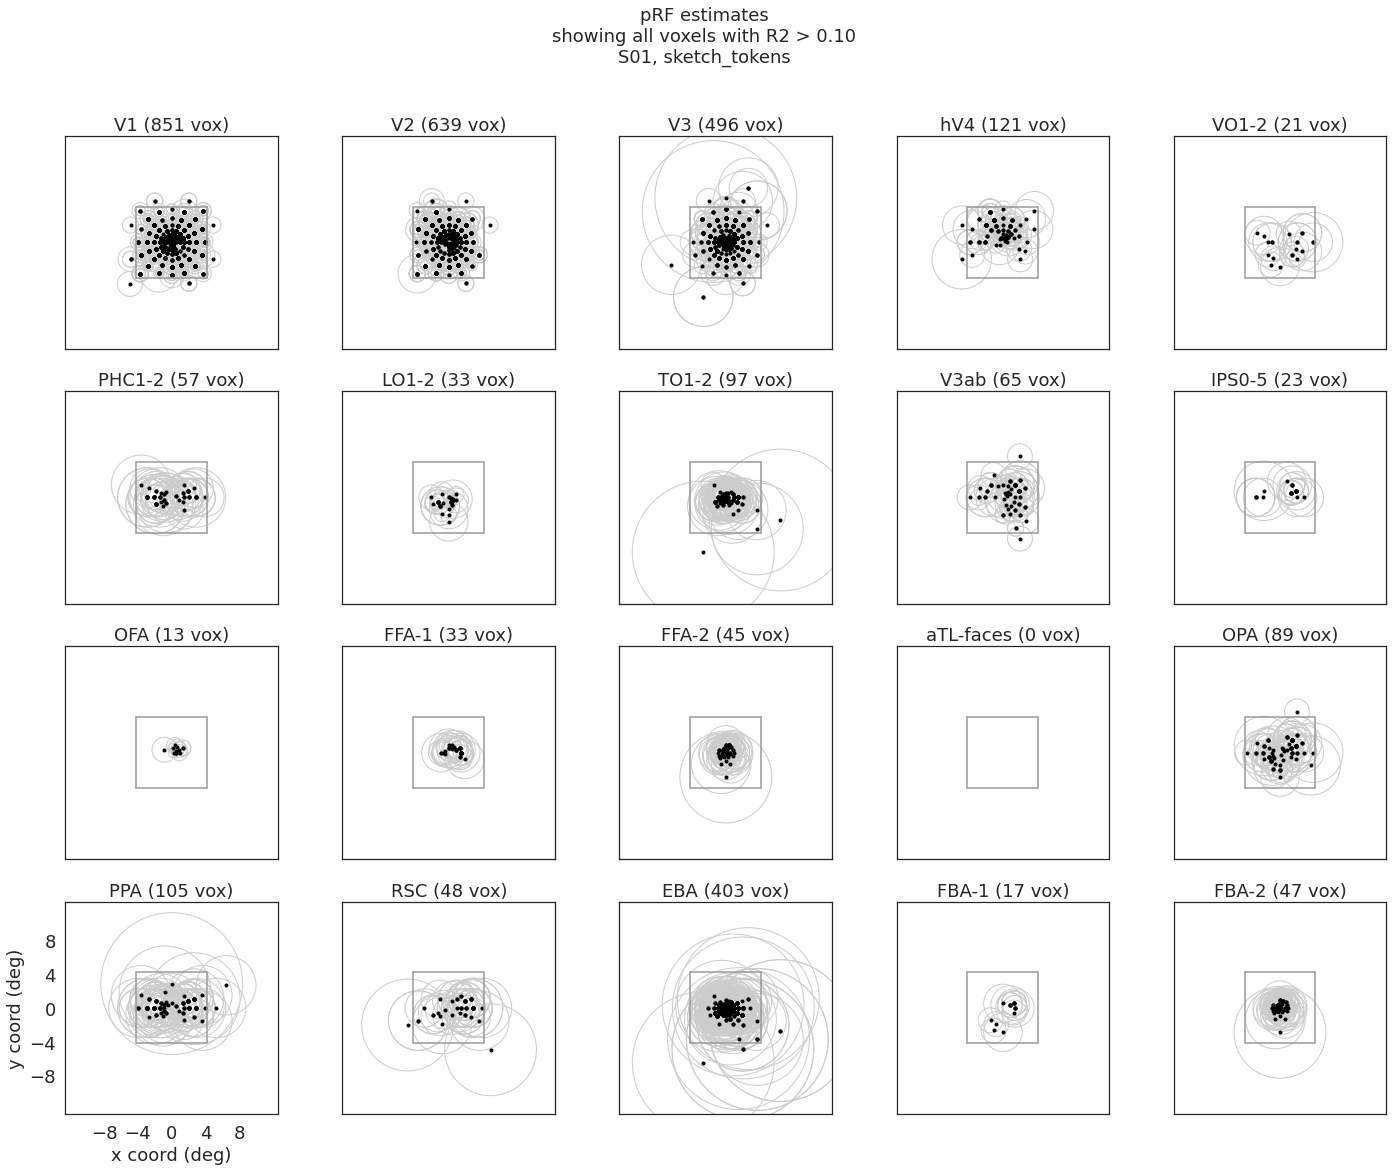

In [10]:
plot_utils.set_all_font_sizes(fs = 18)
plot_prf_params.plot_spatial_rf_circles(subject, fitting_type,out, roi_def=roi_def, skip_inds=skip_inds,\
                                     r2_cutoff = 0.10, fig_save_folder=fig_save_folder)

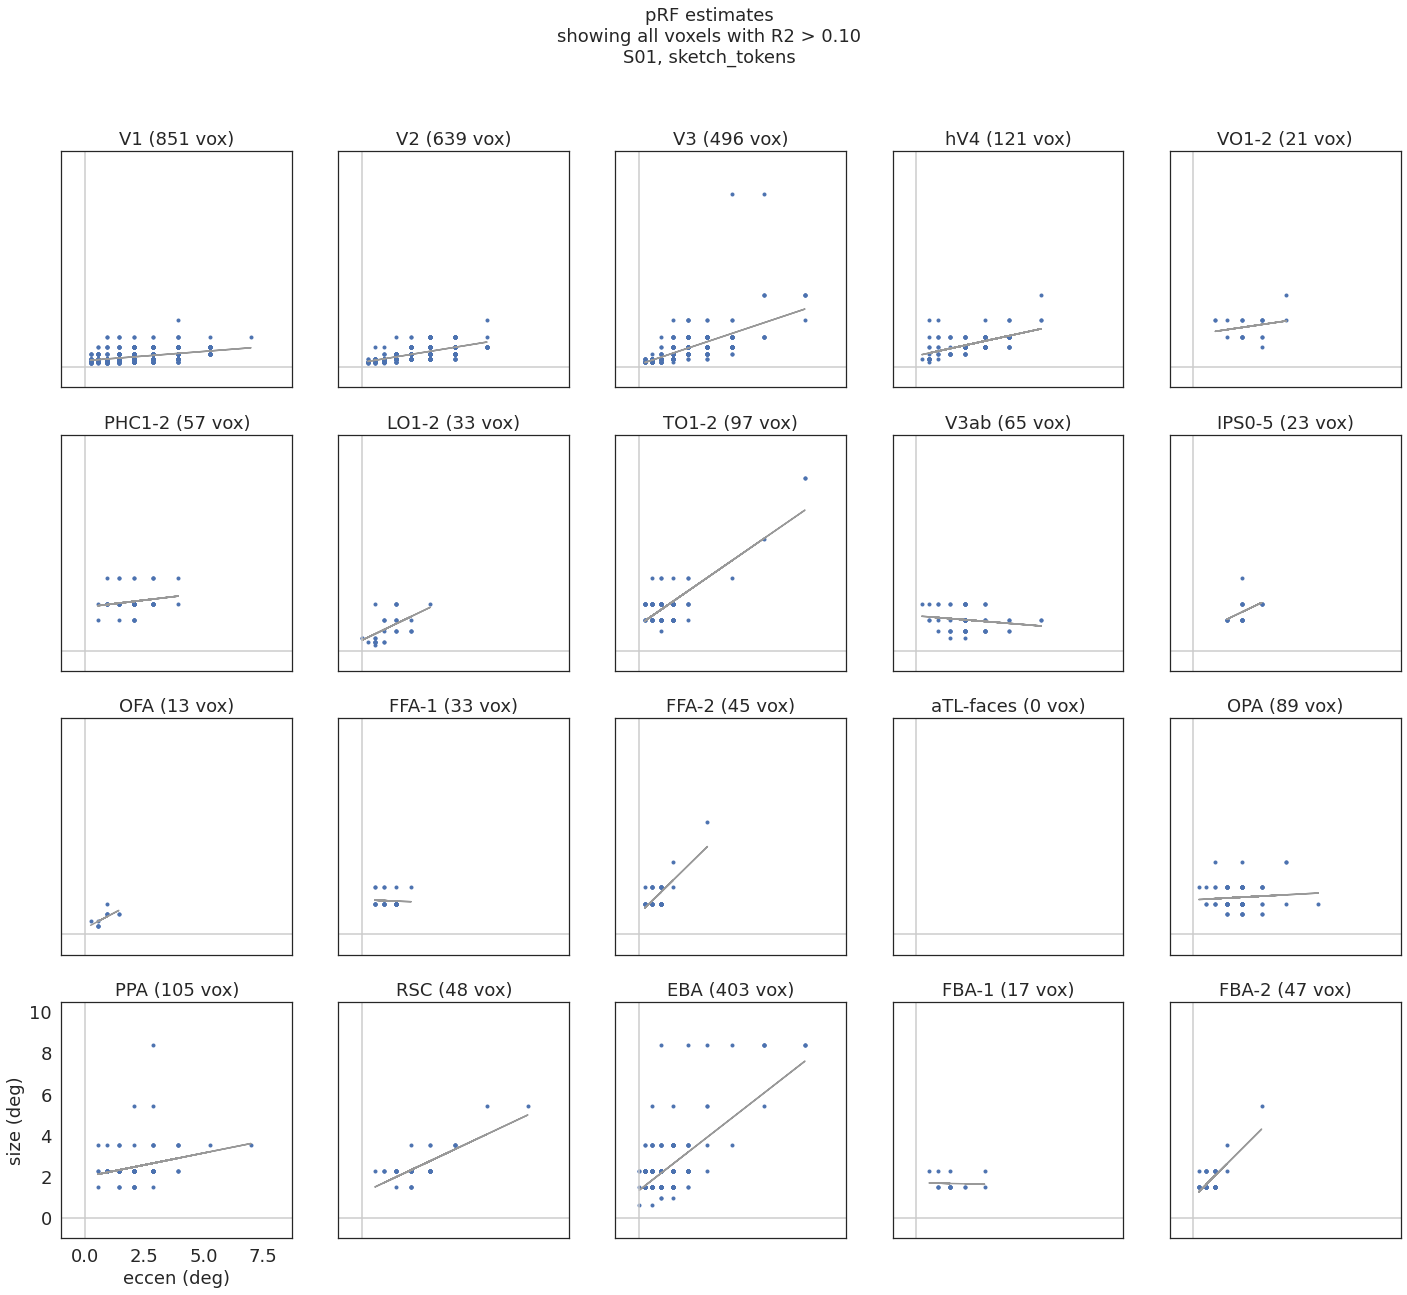

In [11]:
plot_utils.set_all_font_sizes(fs = 18)
plot_prf_params.plot_size_vs_eccen(subject, fitting_type, out, roi_def=roi_def, skip_inds=skip_inds, \
                                   r2_cutoff=0.10, fig_save_folder=fig_save_folder)

In [8]:
feature_weights = out['best_params'][1][:,:,0]
feature_corr = out['corr_each_feature']

In [25]:
best_ecc_deg, best_angle_deg, best_size_deg = plot_prf_params.get_prf_pars_deg(out);
print([np.max(best_ecc_deg), np.max(best_size_deg)])

[6.9999995, 8.4]


In [24]:
np.max(out['models'][:,2]*8.4)

8.4

In [4]:
# Make plots in pycortex for variance partitioning analysis

import cortex
import copy
port=33333

vox2plot = out['val_r2'][:,0]>0

best_ecc_deg, best_angle_deg, best_size_deg = plot_prf_params.get_prf_pars_deg(out);
print([np.max(best_ecc_deg), np.max(best_size_deg)])
names = ['pRF eccentricity', 'pRF angle', 'pRF size']
maps = [best_ecc_deg, best_angle_deg, best_size_deg]
cmaps = ['PRGn', 'Retinotopy_RYBCR', 'PRGn']
mins = [0,0,0]
maxes = [7, 360, 8.4]


maps += [np.sqrt(out['val_r2'][:,0])]
names += ['sketch tokens model R2 (sqrt)']
cmaps += ['PuBu']
mins += [0]
maxes += [0.6]

discrim_each_axis = copy.deepcopy(out['discrim_each_axis'])
discrim_type_list = ['indoor_outdoor','animacy','person','food','vehicle','animal']
n_sem_axes = len(discrim_type_list)
maps += [discrim_each_axis[:,dd] for dd in range(n_sem_axes)]
names += ['dprime: %s'%dd for dd in discrim_type_list]
cmaps += ['RdBu' for dd in range(n_sem_axes)]
mins += [-1.5 for dd in range(n_sem_axes)]
maxes += [1.5 for dd in range(n_sem_axes)]

plot_utils.plot_maps_pycortex(maps, names, subject, out, roi_def=roi_def, vox2plot=vox2plot, \
                              fitting_type=fitting_type, \
                              port=port, cmaps=cmaps, mins=mins, maxes=maxes)

[6.9999995, 8.4]
Data is in 3d volume space
navigate browser to: 127.0.0.1:33333


/home/mmhender/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in sqrt


Started server on port 33333


KeyboardInterrupt: 

In [51]:
nret = len(ret_names)
nface = len(face_names)
nplace = len(place_names)
nbody = len(body_names)    
n_rois = len(ret_names) + len(face_names) + len(place_names) + len(body_names)
roi_names = ret_names+face_names+place_names+body_names

is_ret = np.arange(0, n_rois)<nret
is_face = (np.arange(0, n_rois)>=nret) & (np.arange(0, n_rois)<nret+nface)
is_place = (np.arange(0, n_rois)>=nret+nface) & (np.arange(0, n_rois)<nret+nface+nplace)
is_body = np.arange(0, n_rois)>=nret+nface+nplace


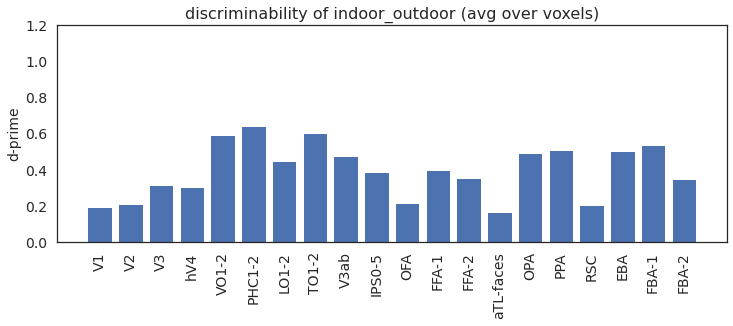

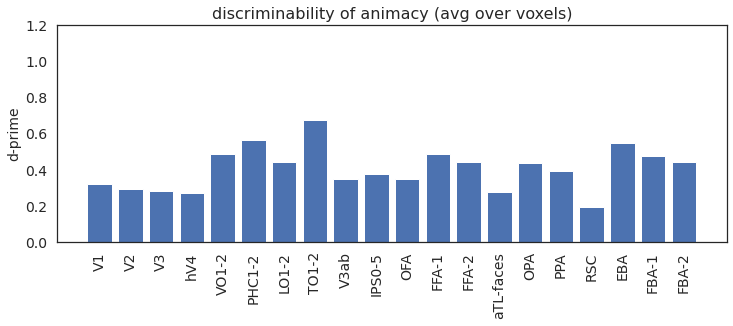

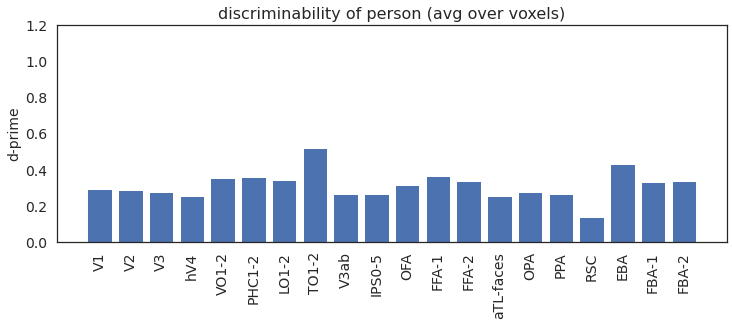

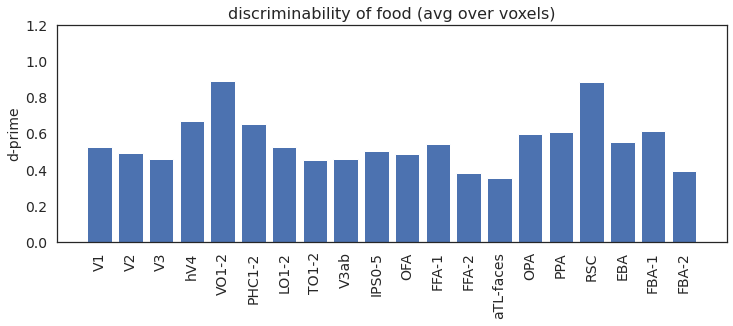

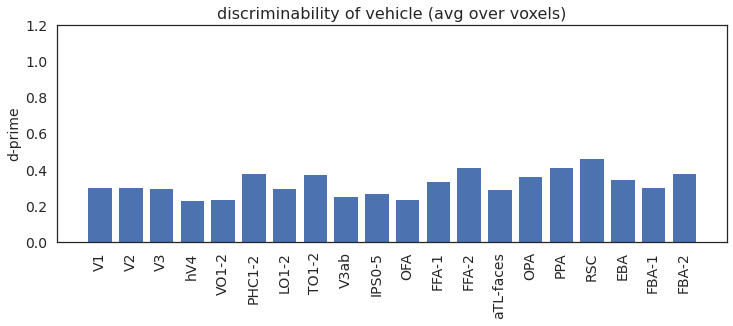

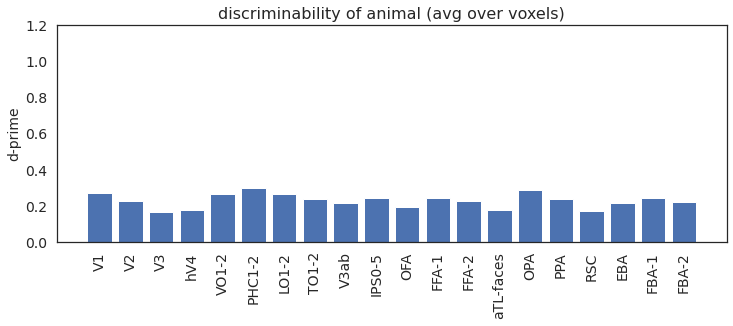

In [6]:
discrim_each_axis = out['discrim_each_axis']
discrim_type_list = ['indoor_outdoor','animacy','person','food','vehicle','animal']
n_sem_axes = len(discrim_type_list)
mean_discrim_each_roi = np.zeros((n_rois, n_sem_axes))

for rr in range(n_rois):
    if rr not in skip_inds:
        if is_ret[rr]:
            inds_this_roi = retlabs==rr
        elif is_face[rr]:
            inds_this_roi = facelabs==(rr-nret)
        elif is_place[rr]:
            inds_this_roi = placelabs==(rr-nret-nface)
        elif is_body[rr]:
            inds_this_roi = bodylabs==(rr-nret-nface-nplace)
        mean_discrim_each_roi[rr,:] = np.mean(np.abs(discrim_each_axis[inds_this_roi,:]), axis=0)
    else:
        mean_discrim_each_roi[rr,:] = np.nan


for aa, discrim_type in enumerate(discrim_type_list):
    plt.figure(figsize=(12,4));
    inds2use = ~np.isin(np.arange(n_rois), skip_inds)
#     inds2use = ~np.isnan(dprime_vals[:,aa])
    n_rois_plot = np.sum(inds2use)
    plt.bar(np.arange(n_rois_plot),mean_discrim_each_roi[inds2use,aa])
    plt.xticks(np.arange(n_rois_plot), labels=np.array(roi_names)[inds2use], rotation=90);
    plt.ylabel('d-prime')
    plt.title('discriminability of %s (avg over voxels)'%discrim_type)
    plt.ylim([0,1.2])

In [42]:
import pandas as pd
dfname = '/user_data/mmhender/features/sketch_tokens/cluster_ims_curv_rect_values.csv'
df = pd.read_csv(dfname)
bend_each_feature = np.array(df['best_bend'])
orient_each_feature = np.array(df['best_orient']*180/np.pi)

bend_values = np.array([0, 0.02,0.07,0.10,0.18,0.45])/8
orients_rad = np.linspace(0,2*np.pi,73)[0:72]
orients_deg = orients_rad*180/np.pi

feature_weights = out['best_params'][1][:,:,0]
feature_corr = out['corr_each_feature']
n_voxels = feature_weights.shape[0]
n_ori = len(np.unique(orients_deg))
n_bend = len(np.unique(bend_values))
n_features = feature_weights.shape[1]

preferred_feature_weights = np.argmax(feature_weights, axis=1).astype(np.float32)
is_constant = np.all(np.tile(feature_weights[:,0:1], [1,n_features])==feature_weights, axis=1)
preferred_feature_weights[is_constant] = np.nan
preferred_ori_weights = orient_each_feature[preferred_feature_weights.astype('int')]
preferred_bend_weights = bend_each_feature[preferred_feature_weights.astype('int')]

preferred_feature_corr = np.argmax(feature_corr, axis=1).astype(np.float32)
is_constant = np.all(np.tile(feature_corr[:,0:1], [1,n_features])==feature_corr, axis=1)
preferred_feature_corr[is_constant] = np.nan
preferred_ori_corr = orient_each_feature[preferred_feature_corr.astype('int')]
preferred_bend_corr = bend_each_feature[preferred_feature_corr.astype('int')]


In [60]:
# Make plots in pycortex 

import cortex

port=33333

vox2plot = out['val_r2'][:,0]>-100

best_ecc_deg, best_angle_deg, best_size_deg = plot_prf_params.get_prf_pars_deg(out);
names = ['pRF eccentricity', 'pRF angle', 'pRF size']
maps = [best_ecc_deg, best_angle_deg, best_size_deg]
cmaps = ['PRGn', 'Retinotopy_RYBCR', 'PRGn']
mins = [0,0,0]
maxes = [10, 360, 8]


maps += [np.sqrt(out['val_r2'][:,0])]
names += ['sketch token model R2 (sqrt)']
cmaps += ['PuBu']
mins += [0]
maxes += [0.6]

maps += [preferred_ori_corr, preferred_bend_corr]
names += ['Preferred orientation (deg)', 'Preferred bend value']
cmaps += ['Retinotopy_RYBCR', 'viridis']
mins += [0, 0]
maxes += [360, 0.05625]

discrim_each_axis = out['discrim_each_axis']
discrim_type_list = ['indoor_outdoor','animacy','person','food','vehicle','animal']
n_sem_axes = len(discrim_type_list)
maps += [discrim_each_axis[:,dd] for dd in range(n_sem_axes)]
names += ['dprime: %s'%dd for dd in discrim_type_list]
cmaps += ['RdBu' for dd in range(n_sem_axes)]
mins += [-1.5 for dd in range(n_sem_axes)]
maxes += [1.5 for dd in range(n_sem_axes)]



plot_utils.plot_maps_pycortex(maps, names, subject, out, roi_def=roi_def, vox2plot=vox2plot, \
                              fitting_type=fitting_type, \
                              port=port, cmaps=cmaps, mins=mins, maxes=maxes)

/home/mmhender/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt


Data is in 3d volume space
navigate browser to: 127.0.0.1:33333
Started server on port 33333


In [86]:
# Find an ordering for the sketch tokens features that captures bend/orient info
sorder = np.argsort(bend_each_feature)
bends_sorted = bend_each_feature[sorder]
orients_sorted = orient_each_feature[sorder]

for bb in range(n_bend):
    inds = np.where(bends_sorted==bend_values[bb])[0]
    orients_to_sort = orients_sorted[inds]
    sorder_to_sort = sorder[inds]
    
    orient_sorder = np.argsort(orients_to_sort)
    orients_sorted[inds] = orients_to_sort[orient_sorder]
    sorder[inds] = sorder_to_sort[orient_sorder]
    
bends_sorted = bend_each_feature[sorder]
orients_sorted = orient_each_feature[sorder]

In [100]:
np.where(bends_sorted==bend_values[3])[0][0]

146

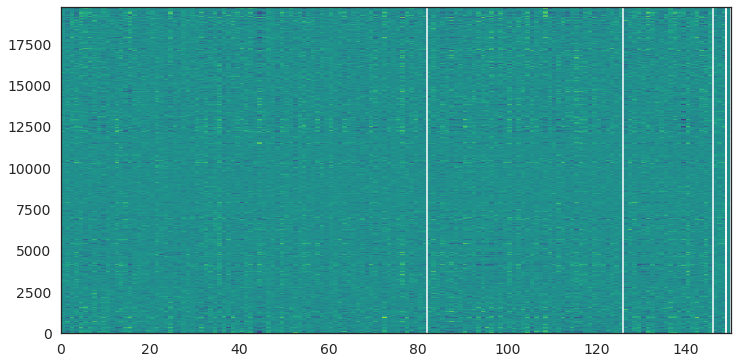

Stopping server


In [101]:
plt.figure(figsize=(12,6));
plt.pcolormesh(feature_weights[:,sorder])
count = 0
for bb in range(n_bend):
    count += np.sum(bends_sorted==bend_values[bb])
    plt.axvline(count, color='w')

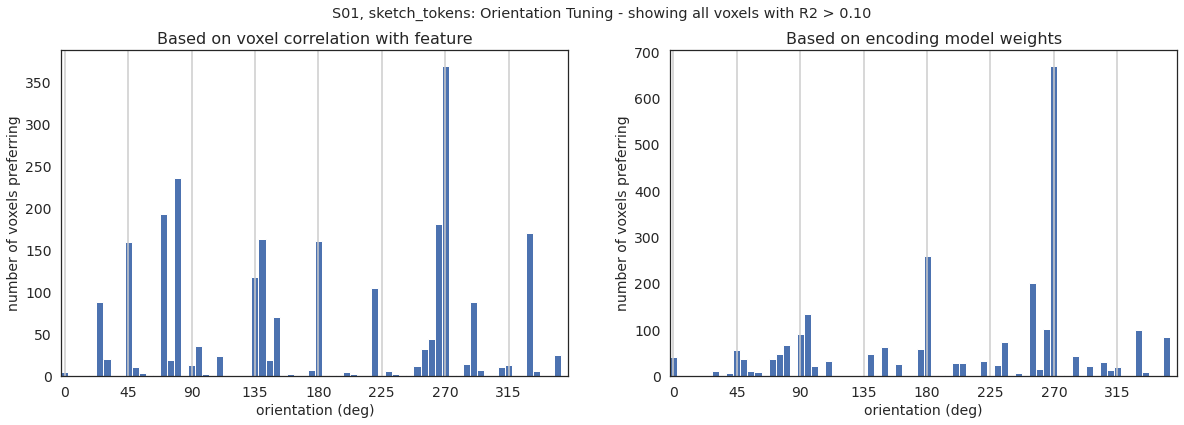

In [30]:
# Plot histogram of the orientation "tuning preferences" 
plt.figure(figsize=(20,6))

r2_cutoff = 0.10
val_r2 = out['val_r2'][:,0]
abv_thresh = val_r2>r2_cutoff

plt.subplot(1,2,1)
spacing = orients_deg[1] - orients_deg[0]
neach = [np.sum(preferred_ori_corr[abv_thresh].astype('int')==int(orients_deg[oo])) for oo in range(n_ori)]
plt.bar(orients_deg, neach, width=spacing)
plt.xticks(np.arange(0,361,45))
plt.xlim([-spacing/2,360-spacing/2])
plt.xlabel('orientation (deg)')
plt.ylabel('number of voxels preferring')
plt.title('Based on voxel correlation with feature')
for ii in np.arange(0,361,45):
    plt.axvline(ii,color=[0.8, 0.8, 0.8])
    
plt.subplot(1,2,2)
neach = [np.sum(preferred_ori_weights[abv_thresh].astype('int')==int(orients_deg[oo])) for oo in range(n_ori)]
plt.bar(orients_deg, neach, width=spacing)
plt.xticks(np.arange(0,361,45))
plt.xlim([-spacing/2,360-spacing/2])
plt.xlabel('orientation (deg)')
plt.ylabel('number of voxels preferring')
plt.title('Based on encoding model weights')
for ii in np.arange(0,361,45):
    plt.axvline(ii,color=[0.8, 0.8, 0.8])
     
plt.suptitle('S%02d, %s: Est Orientation Tuning - showing all voxels with R2 > %.2f'%(subject, fitting_type, r2_cutoff));

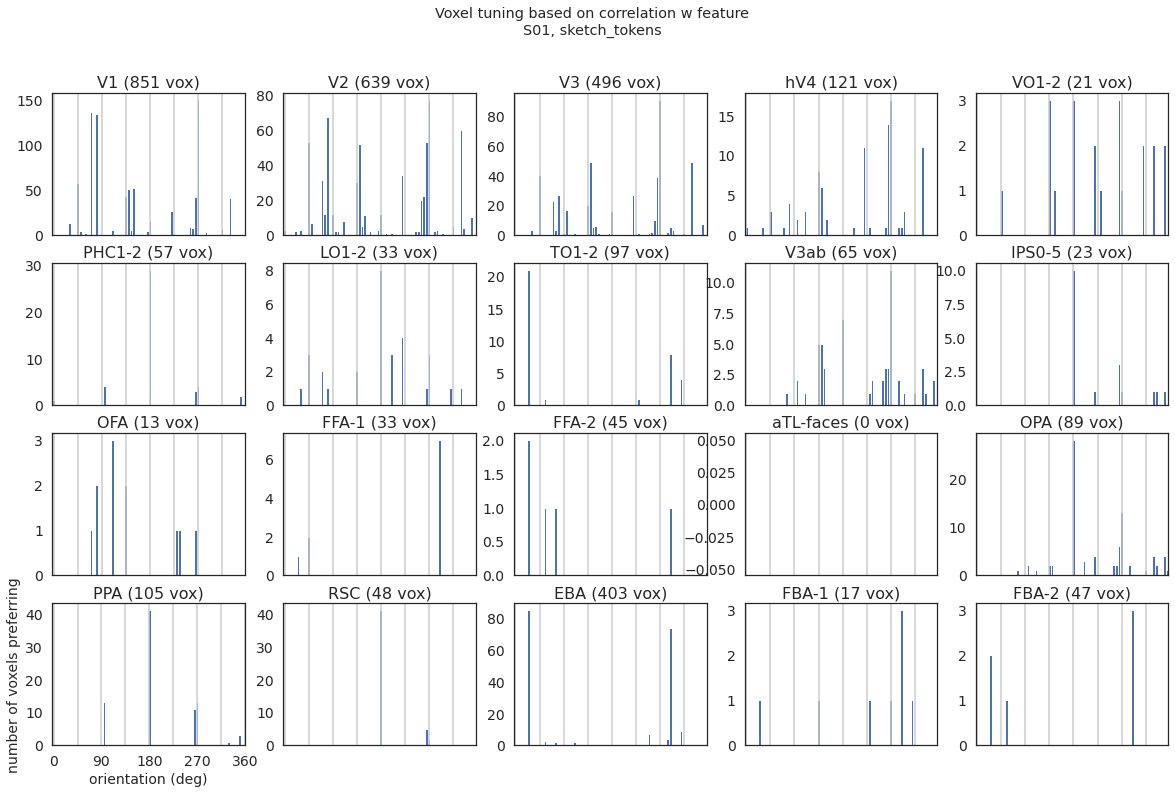

In [54]:

r2_cutoff = 0.10
val_r2 = out['val_r2'][:,0]
abv_thresh = val_r2>r2_cutoff


plt.figure(figsize=(20,12))
npy = int(np.ceil(np.sqrt(n_rois-len(skip_inds))))
npx = int(np.ceil((n_rois-len(skip_inds))/npy))

pi=0
for rr in range(n_rois):

    if rr not in skip_inds:
        if is_ret[rr]:
            inds_this_roi = retlabs==rr
            rname = ret_names[rr]
        elif is_face[rr]:
            inds_this_roi = facelabs==(rr-nret)
            rname = face_names[rr-nret]
        elif is_place[rr]:
            inds_this_roi = placelabs==(rr-nret-nface)
            rname = place_names[rr-nret-nface]
        elif is_body[rr]:
            inds_this_roi = bodylabs==(rr-nret-nface-nplace)
            rname = body_names[rr-nret-nface-nplace]

        inds_this_roi = inds_this_roi & abv_thresh
        pi+=1
        plt.subplot(npx,npy,pi)

        spacing = orients_deg[1] - orients_deg[0]
        neach = [np.sum(preferred_ori_corr[inds_this_roi].astype('int')==int(orients_deg[oo])) \
                 for oo in range(n_ori)]
        plt.bar(orients_deg, neach, width=spacing)
        
        plt.xlim([-spacing/2,360-spacing/2])

#         print(pi)
        if pi==(npx-1)*npy+1:
            plt.xlabel('orientation (deg)')
            plt.ylabel('number of voxels preferring')
            plt.xticks(np.arange(0,361,90))
        else:
            plt.xticks([]);
    #         plt.yticks([])

        for ii in np.arange(0,361,45):
            plt.axvline(ii,color=[0.8, 0.8, 0.8])
    
        plt.title('%s (%d vox)'%(rname, np.sum(inds_this_roi)))

plt.suptitle('Voxel tuning based on correlation w feature\nS%02d, %s'%(subject, fitting_type));


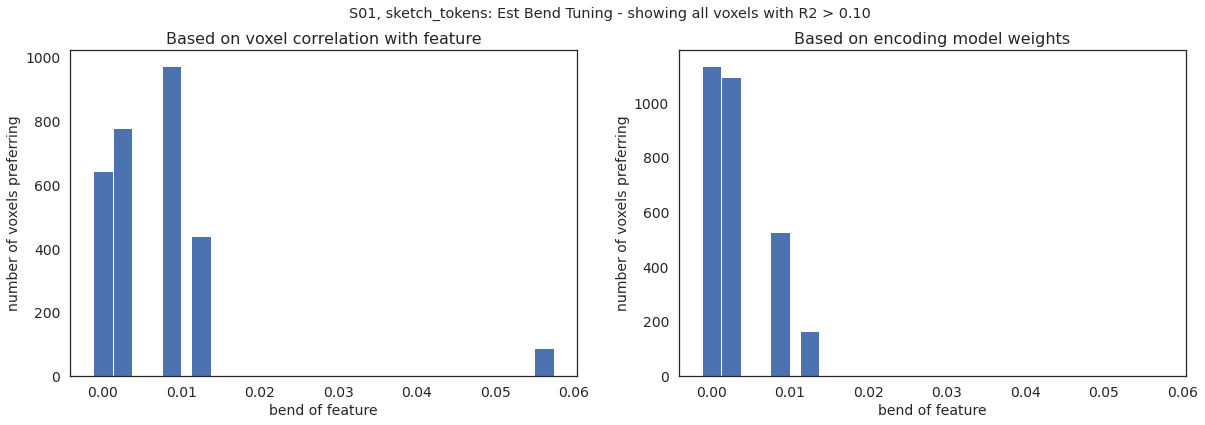

In [55]:
# Plot histogram of the orientation "tuning preferences" 
plt.figure(figsize=(20,6))

r2_cutoff = 0.10
val_r2 = out['val_r2'][:,0]
abv_thresh = val_r2>r2_cutoff

plt.subplot(1,2,1)
spacing = bend_values[1] - bend_values[0]
neach = [np.sum(preferred_bend_corr[abv_thresh]==bend_values[bb]) for bb in range(n_bend)]
plt.bar(bend_values, neach, width=spacing)
# plt.xticks(np.arange(0,361,45))
# plt.xlim([-spacing/2,360-spacing/2])
plt.xlabel('bend of feature')
plt.ylabel('number of voxels preferring')
plt.title('Based on voxel correlation with feature')
# for ii in np.arange(0,361,45):
#     plt.axvline(ii,color=[0.8, 0.8, 0.8])
    
plt.subplot(1,2,2)
neach = [np.sum(preferred_bend_weights[abv_thresh]==bend_values[bb]) for bb in range(n_bend)]
plt.bar(bend_values, neach, width=spacing)
# plt.xticks(np.arange(0,361,45))
# plt.xlim([-spacing/2,360-spacing/2])
plt.xlabel('bend of feature')
plt.ylabel('number of voxels preferring')
plt.title('Based on encoding model weights')
# for ii in np.arange(0,361,45):
#     plt.axvline(ii,color=[0.8, 0.8, 0.8])
     
plt.suptitle('S%02d, %s: Est Bend Tuning - showing all voxels with R2 > %.2f'%(subject, fitting_type, r2_cutoff));

In [58]:
[-bend_values[1], bend_values[-1]+bend_values[1]]

[-0.0025, 0.058750000000000004]

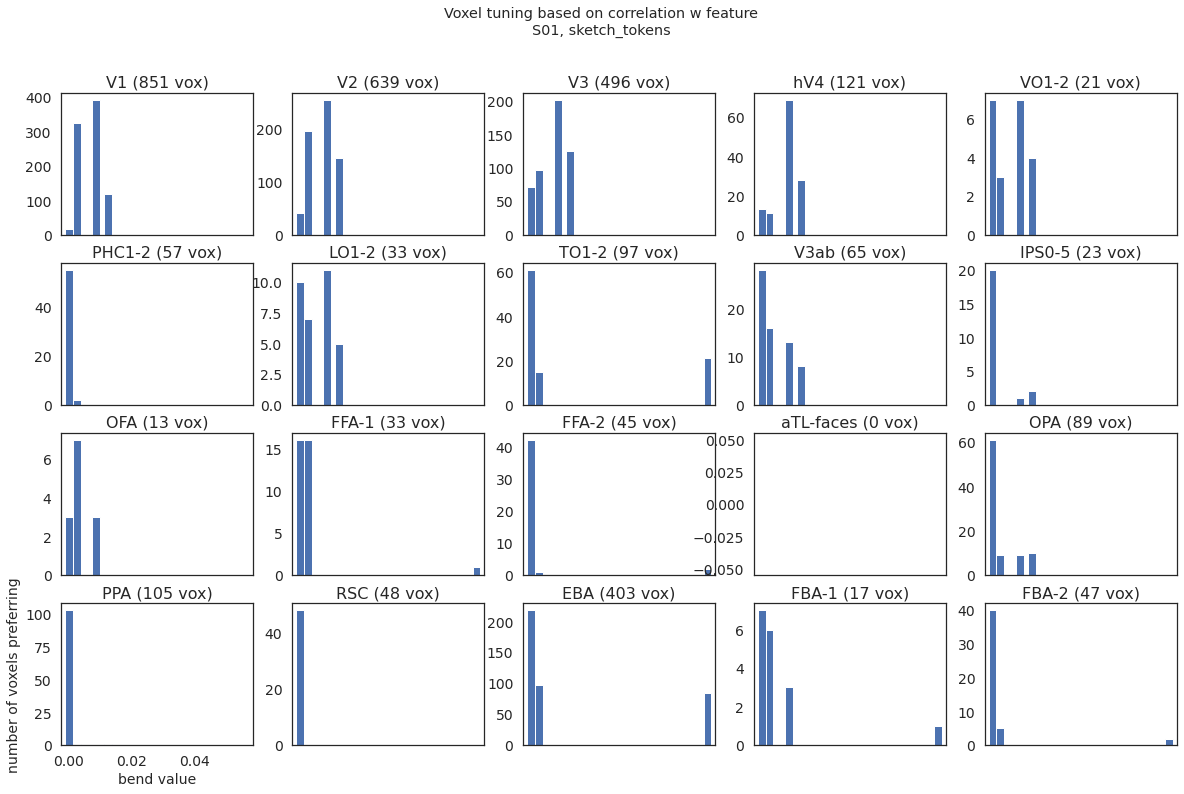

In [59]:

r2_cutoff = 0.10
val_r2 = out['val_r2'][:,0]
abv_thresh = val_r2>r2_cutoff


plt.figure(figsize=(20,12))
npy = int(np.ceil(np.sqrt(n_rois-len(skip_inds))))
npx = int(np.ceil((n_rois-len(skip_inds))/npy))

pi=0
for rr in range(n_rois):

    if rr not in skip_inds:
        if is_ret[rr]:
            inds_this_roi = retlabs==rr
            rname = ret_names[rr]
        elif is_face[rr]:
            inds_this_roi = facelabs==(rr-nret)
            rname = face_names[rr-nret]
        elif is_place[rr]:
            inds_this_roi = placelabs==(rr-nret-nface)
            rname = place_names[rr-nret-nface]
        elif is_body[rr]:
            inds_this_roi = bodylabs==(rr-nret-nface-nplace)
            rname = body_names[rr-nret-nface-nplace]

        inds_this_roi = inds_this_roi & abv_thresh
        pi+=1
        plt.subplot(npx,npy,pi)

        spacing = bend_values[1] - bend_values[0]
        neach = [np.sum(preferred_bend_corr[inds_this_roi]==bend_values[bb]) for bb in range(n_bend)]
        plt.bar(bend_values, neach, width=spacing)
        
        plt.xlim([-spacing, bend_values[-1]+spacing])

#         print(pi)
        if pi==(npx-1)*npy+1:
            plt.xlabel('bend value')
            plt.ylabel('number of voxels preferring')
#             plt.xticks(np.arange(0,361,90))
        else:
            plt.xticks([]);
    #         plt.yticks([])

#         for ii in np.arange(0,361,45):
#             plt.axvline(ii,color=[0.8, 0.8, 0.8])
    
        plt.title('%s (%d vox)'%(rname, np.sum(inds_this_roi)))

plt.suptitle('Voxel tuning based on correlation w feature\nS%02d, %s'%(subject, fitting_type));
